In [28]:
import numpy as np
from scipy.fftpack import idct, dct, fft, ifft
import matplotlib.pyplot as plt

from skimage import io

T_D = 40
S_D = 0

In [29]:
def apply_dct(image):
    dct_rows = dct(image, type=4, axis=0, norm=None)
    dct_image = dct(dct_rows, type=4, axis=1, norm=None)
    # dct_rows = fft(image)
    # dct_image = fft(dct_rows)
    return dct_image

def rebuild_image(dct_image):
    idct_rows = idct(dct_image, type=4, axis=1, norm=None)
    idct_image = idct(idct_rows, type=4, axis=0, norm=None)
    # idct_rows = ifft(dct_image)
    # idct_image = ifft(idct_rows)
    return idct_image

def threshold_filter(dct_image, T_D, S_D):
    magnitude_spectrum = np.log1p(1+(np.abs(dct_image))**2)
    mask = magnitude_spectrum >= T_D
    filtered_dct = np.zeros_like(dct_image)
    filtered_magspec = np.zeros_like(dct_image)
    print(np.mean(dct_image))
    filtered_dct[mask] = S_D
    filtered_dct[~mask] = dct_image[~mask]

    filtered_magspec[mask] = 255
    filtered_magspec[~mask] = magnitude_spectrum[~mask]

    return filtered_dct, filtered_magspec

def overhaul(image_path, T_D):
    image = io.imread(image_path, as_gray=True)
    dct_image = apply_dct(image)
    filtered_dct, filtered_magspec = threshold_filter(dct_image, T_D, S_D)
    #print(filtered_dct)
    filtered_image = rebuild_image(filtered_dct)
    return dct_image, filtered_dct, filtered_magspec, filtered_image

0.3041297073294834
0.3075086741066588


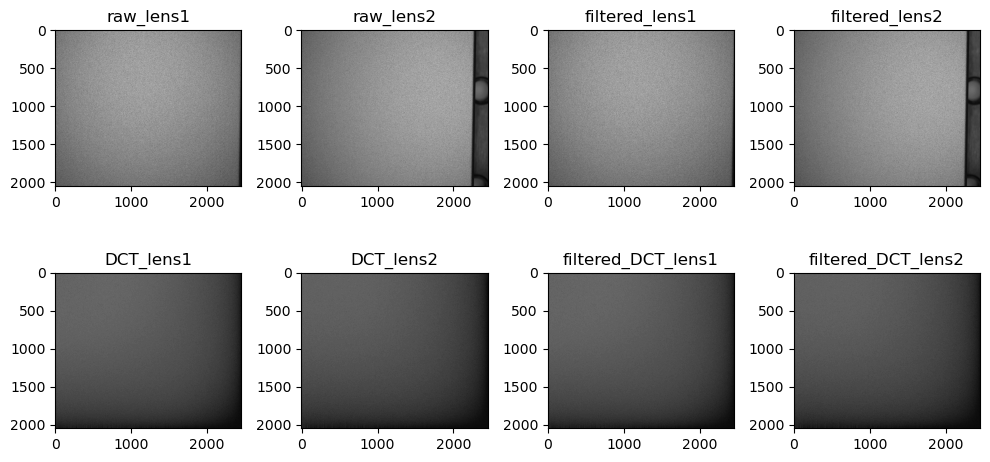

In [30]:
image_path1 = '/home/unitx/Downloads/macbook_images/VS_side02.png'
image_path2 = '/home/unitx/Downloads/macbook_images/VS_side01.png'
dct_NG, filtered_dct_NG, filtered_magspec_NG, filtered_NG = overhaul(image_path1, T_D)
dct_OK, filtered_dct_OK, filtered_magspec_OK, filtered_OK = overhaul(image_path2, T_D)

fig, axes = plt.subplots(2, 4, figsize=(10, 5))

axes[0,0].imshow(io.imread(image_path1, as_gray=True), cmap='gray')
axes[0,0].set_title('raw_lens1')

axes[0,1].imshow(io.imread(image_path2, as_gray=True), cmap='gray')
axes[0,1].set_title('raw_lens2')

axes[0,2].imshow(filtered_NG, cmap='gray')
axes[0,2].set_title('filtered_lens1')

axes[0,3].imshow(filtered_OK, cmap='gray')
axes[0,3].set_title('filtered_lens2')

axes[1,0].imshow(np.log1p(1 + (np.abs(dct_NG))**2), cmap='gray')
axes[1,0].set_title('DCT_lens1')

axes[1,1].imshow(np.log1p(1 + (np.abs(dct_OK))**2), cmap='gray')
axes[1,1].set_title('DCT_lens2')

axes[1,2].imshow(filtered_magspec_NG, cmap='gray')
axes[1,2].set_title('filtered_DCT_lens1')

axes[1,3].imshow(filtered_magspec_OK, cmap='gray')
axes[1,3].set_title('filtered_DCT_lens2')

plt.tight_layout()
plt.show()

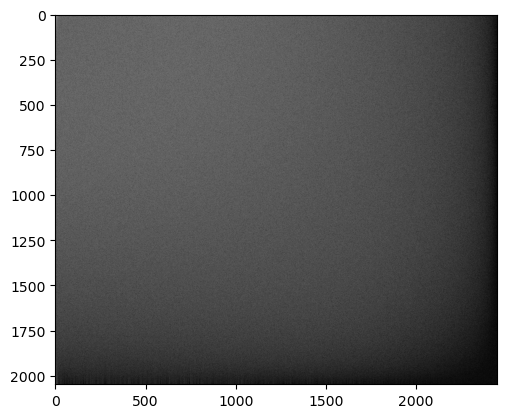

In [31]:
plt.imshow(filtered_magspec_NG, cmap='gray')
plt.show()